# This notebook has codes for using random forest from scikit learn for image classifications using pixels.<br>This was done for an assignment for a data science class.

## Question1: Handwriting Recognition using Machine Learning

In [10]:
import os
import pandas as pd
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

## A) Download the dataset “Digit” and its label from this link:  https://app.box.com/s/sogk96kukv6ayyyy6ym63a2nu3aozif7

In [11]:
'''
We are setting our paths for our files to be used trough out the program
We also create a dataframe where we import our csv file
'''
path = os.getcwd() + '\\Digit' +'\\'
labels = pd.read_csv(os.getcwd() + "\\label.csv")
filenames = labels['name of the file']

## B) Build the feature matrix and label vector: Each image is considered as a data sample with pixels as features. Thus, to build the feature table you have to convert each 8x8 image into an array of 64 elements (i.e. 64 pixels), and put it as a row of the feature matrix with 64 feature columns.

In [12]:
#well create a maxtrix for all our pixel values
pixel_matrix = []
for pixels in filenames:
    #this list will hold the current pixels for an image
    current_image_pixels = []
    #this loads the image
    load_image = mpimg.imread(path + str(pixels)+ '.jpg')
    #this stores the images pixel value as a numpy array
    current_pixel_np_array = np.asarray(load_image)
    #iterate through the pixels and store them
    for x in current_pixel_np_array:
        for y in x:
            current_image_pixels.append(y)
    #append the nth pixel array to our pixel matrix
    pixel_matrix.append(current_image_pixels)

In [13]:
#we create a df where we import our feature matrix
features_and_labels = pd.DataFrame(pixel_matrix)

In [14]:
features_and_labels

0   1    2    3    4    5   6   7   8    9   ...   54  55  56  57   58  \
0      0   2   88  217  158   21   0   0  16    0  ...    4   0   4   3   87   
1      0   0   11  187  210   78   5   0  13    5  ...    0   0   0   0    0   
2      0   0    5   59  240  199   2   0   5    0  ...   92   0   0  11    0   
3      6   0  108  255  213   13  10   0   2  131  ...  168   1   0   0  118   
4      0   6    0   34  160    7   7   0   5    0  ...    7   0   0   0    2   
...   ..  ..  ...  ...  ...  ...  ..  ..  ..  ...  ...  ...  ..  ..  ..  ...   
1792   5   0   69  160  198  102   6   0   0   24  ...   61   1   3   1   39   
1793   6   0   96  255  206  164  22   0   3    0  ...    8   3   9   0   92   
1794   5   0   22  172  242   20   0   0   0    1  ...    0  16   3   0   27   
1795   7   0   22  158  114    0   8   2   0    6  ...   39   0  12   0   83   
1796   0  17  155  236  123   20   0   4  20   10  ...  130   8   0  17  137   

       59   60   61   62  63  
0     228  182    0    9   2  
1     172  251  157    0  12  
2      54  173  255  138   0  
3     217  226  159    0   3  
4      42  250   51    0   4  
...   ...  ...  ...  ...  ..  
1792  219  246  130   13   0  
1793  246  227   90    0   1  
1794  152  211   87   21   0  
1795  185  255  196    0   7  
1796  184  214  198   26   0  

[1797 rows x 64 columns]

In [15]:
#adding our target/label
features_and_labels['target'] = labels['digit label']

In [16]:
features_and_labels

0   1    2    3    4    5   6  7   8    9  ...  55  56  57   58   59  \
0     0   2   88  217  158   21   0  0  16    0  ...   0   4   3   87  228   
1     0   0   11  187  210   78   5  0  13    5  ...   0   0   0    0  172   
2     0   0    5   59  240  199   2  0   5    0  ...   0   0  11    0   54   
3     6   0  108  255  213   13  10  0   2  131  ...   1   0   0  118  217   
4     0   6    0   34  160    7   7  0   5    0  ...   0   0   0    2   42   
...  ..  ..  ...  ...  ...  ...  .. ..  ..  ...  ...  ..  ..  ..  ...  ...   
1792  5   0   69  160  198  102   6  0   0   24  ...   1   3   1   39  219   
1793  6   0   96  255  206  164  22  0   3    0  ...   3   9   0   92  246   
1794  5   0   22  172  242   20   0  0   0    1  ...  16   3   0   27  152   
1795  7   0   22  158  114    0   8  2   0    6  ...   0  12   0   83  185   
1796  0  17  155  236  123   20   0  4  20   10  ...   8   0  17  137  184   

       60   61   62  63  target  
0     182    0    9   2       0  
1     251  157    0  12       1  
2     173  255  138   0       2  
3     226  159    0   3       3  
4     250   51    0   4       4  
...   ...  ...  ...  ..     ...  
1792  246  130   13   0       9  
1793  227   90    0   1       0  
1794  211   87   21   0       8  
1795  255  196    0   7       9  
1796  214  198   26   0       8  

[1797 rows x 65 columns]

## C) Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.1, random_state=2.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#extracting our column names with this vector that holds them
feature_columns = [*range(0,64)]
label_vector = 'target'
#feature matrix and target/label vector
feature_matrix = features_and_labels[feature_columns]
target_vector = features_and_labels[label_vector]

## splitting into testing and training

In [19]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix,target_vector, test_size = 0.1, random_state = 2)

## D) Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on the training/testing datasets that you built in part (c). Use this command to import and define your classifier:

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [22]:
#fit our model
random_forrest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state = 2)
random_forrest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=19, random_state=2)

In [23]:
#testing our fitted model
y_prediction = random_forrest.predict(X_test)

In [24]:
random_forrest_score = accuracy_score(y_test,y_prediction )

In [25]:
print('Accuracy Score for Random Forrest: ',random_forrest_score)

Accuracy Score for Random Forrest:  0.9277777777777778


## E) Write some codes to find which one of the data samples (i.e. which images) have been misclassified (classified incorrectly) in your testing set. Then, use the following command to show the misclassified images:    plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')

In [26]:
# plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')
# we take our test label vector

In [27]:
type(y_prediction)

numpy.ndarray

In [28]:
type(y_test.index)

pandas.core.indexes.numeric.Int64Index

In [29]:
# we need to compare our y_prediction with out y_test (testing labels)

In [30]:
misclassified = np.array([])

In [31]:
len(y_prediction)

180

In [33]:
counter = [*range(len(y_prediction))]
counter

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179]

In [34]:
# we will iterate through our prediction and test vectors; compare them element by element and
# if they dont match we store that index in a separate variable to be called later
counter = [range(len(y_prediction))]
for counter,test in zip([*range(180)],y_test.index):
    if (y_prediction[counter] != y_test[test]):
        misclassified = np.append(misclassified,test)
        
    misclassified = misclassified.astype(int)

In [35]:
misclassified

array([1660, 1611,  123, 1582,  492, 1603, 1628, 1605,  794,   37,   69,
       1468, 1573])

In [36]:
len(misclassified)

13

In [37]:
#lastly we'll iterate using these indicies and use our plotting functions

In [38]:
type(mpimg.imread(os.getcwd()+'\\Digit\\' + str(misclassified[0]) + '.jpg'))

numpy.ndarray

In [39]:
misclassfied_plot_values = np.array([])
counter = 0
for i in misclassified:
    print(counter)
    print(i)
    current_image = mpimg.imread(os.getcwd()+'\\Digit\\' + str(i) + '.jpg')
    misclassfied_plot_values = np.append(misclassfied_plot_values,current_image)
    counter += 1

0
1660
1
1611
2
123
3
1582
4
492
5
1603
6
1628
7
1605
8
794
9
37
10
69
11
1468
12
1573


In [40]:
misclassfied_plot_values.shape

(832,)

In [41]:
misclassfied_plot_values = np.reshape(misclassfied_plot_values,(counter,8,8))

In [42]:
misclassfied_plot_values.shape

(13, 8, 8)

In [43]:
misclassfied_plot_values[0].shape

(8, 8)

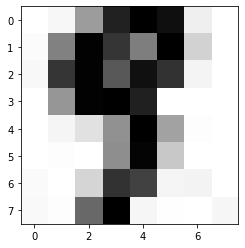

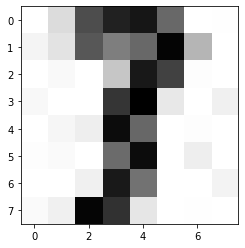

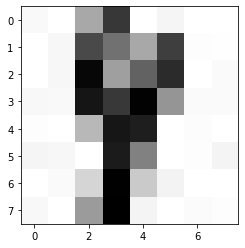

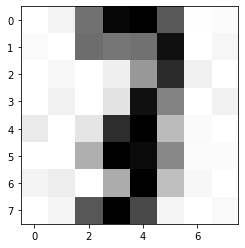

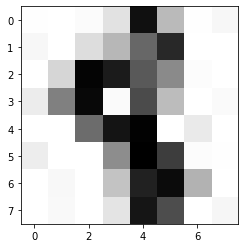

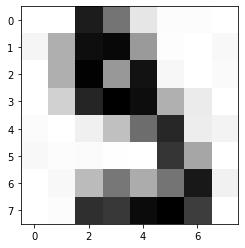

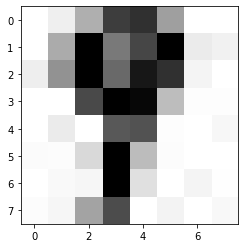

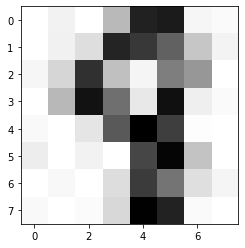

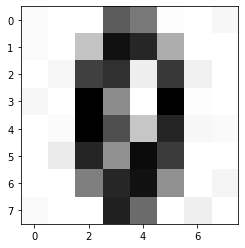

In [44]:
#plot the pixels
for i in misclassfied_plot_values:
    plt.figure()
    plt.imshow(i, cmap=plt.cm.gray_r, interpolation='nearest')
    